<a href="https://colab.research.google.com/github/kishorpatil03/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA on Hotel Booking Analysis**
## By ***Kishor Shivaji Patil***
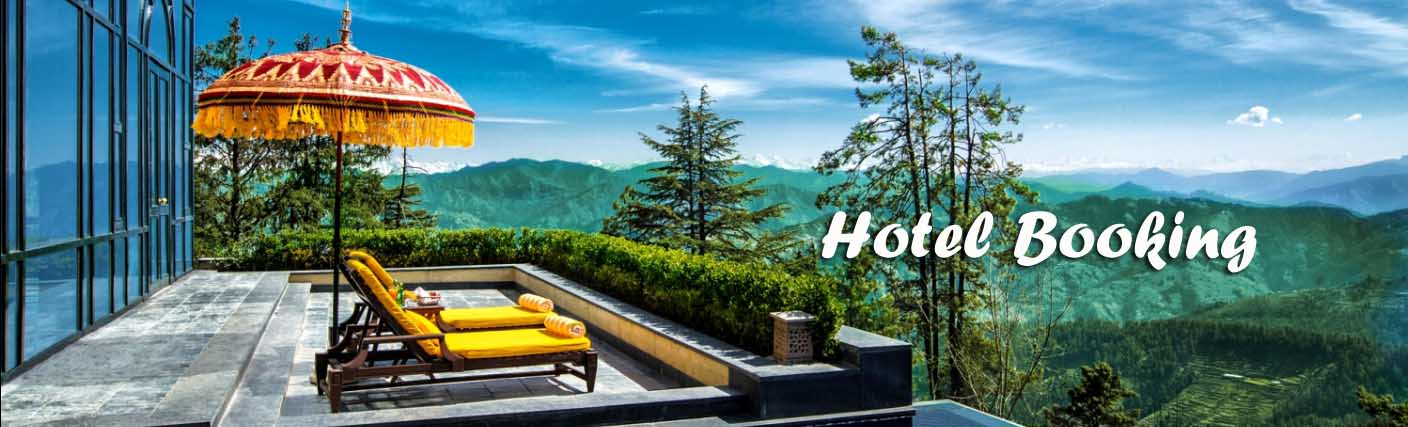

#Problem Statement :-

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Understanding the Hotel Booking Data.**

firstly, we have to know the some parameters like the main few things I will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we ae able to know different types of bookings (i.e type of hotel, duration of stay, types of visitors, types of booking, etc).

# **Index:**

**1. Importing all the important libraries.**

**2. Importing data from the local drive.**

**3. Basic Examination.**

**4. Data Cleansing Techniques To Get Rid Of Unwanted Data and Outliers.**

**5. Data Visualization**

**6. Conclusion.**

# **1. Importing all the important libraries.**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **2. Importing data from the Google drive.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

**Lets See how our data looks like**

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Lets check out the elements in the data**

In [6]:
df.shape

(119390, 32)

**Let's check out the parameters mentioned in the columns**

In [7]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

**let's check out the data type of each column**

In [8]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**classifying the type of hotels we have in our data by ploting a histogram**

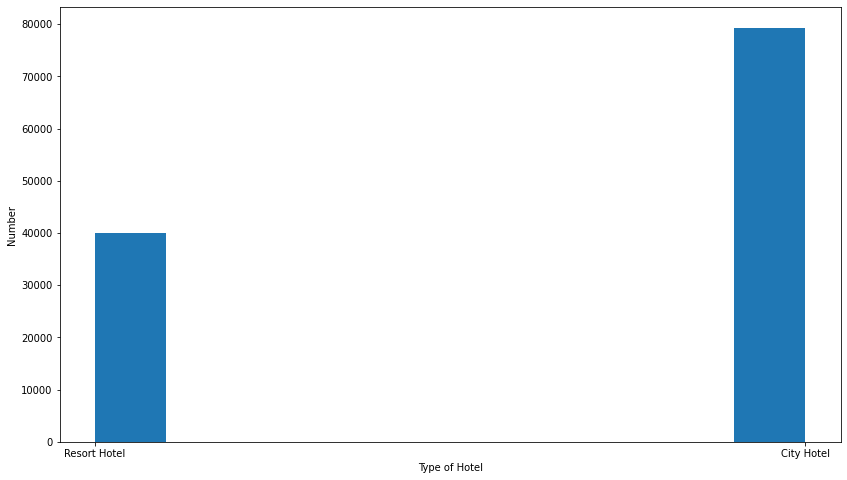

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(df['hotel'])
ax.set_xlabel('Type of Hotel')
ax.set_ylabel('Number')
plt.show()

# **Data cleaning**

**Lets Check for the duplicate data**

In [10]:
duplicate_rows_df = df[df.duplicated()].shape

print(f"the no. of duplicate rows :" , duplicate_rows_df)

the no. of duplicate rows : (31994, 32)


**Lets drop the duplicate values**

In [11]:
df=df.drop_duplicates()
df.shape

(87396, 32)

In [12]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


**As the column name 'Company' and 'Agent' have lots of null values,So we will drop these columns**

In [13]:
df = df.drop(columns=['company','agent'])

In [14]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

**Now we only have 'children' and 'country' data with null values , so drop the unavailable data**

In [15]:
df=df.dropna()

#To insure we don't have any null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.count()

hotel                             86940
is_canceled                       86940
lead_time                         86940
arrival_date_year                 86940
arrival_date_month                86940
arrival_date_week_number          86940
arrival_date_day_of_month         86940
stays_in_weekend_nights           86940
stays_in_week_nights              86940
adults                            86940
children                          86940
babies                            86940
meal                              86940
country                           86940
market_segment                    86940
distribution_channel              86940
is_repeated_guest                 86940
previous_cancellations            86940
previous_bookings_not_canceled    86940
reserved_room_type                86940
assigned_room_type                86940
booking_changes                   86940
deposit_type                      86940
days_in_waiting_list              86940
customer_type                     86940


Observation from the given **86940** values using describe

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,0.753497,106.574804,0.083448,0.699459
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,10.041816,54.957439,0.280402,0.831840
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# **Quick observation From Dataset -**


*   **27.4 % of the people have cancelled their booking as per the dataset.**
*   **Avg. lead time is 80 days.**
*   **Only 4% of the guests are repeated.**
*  **Each booking has on an average 1.8 adults and 0.13 children.**









# **DATA VISUALIZATION**

**After cleaning the data broadly classify the type of hotels we have in our data by the ploting a histogram**

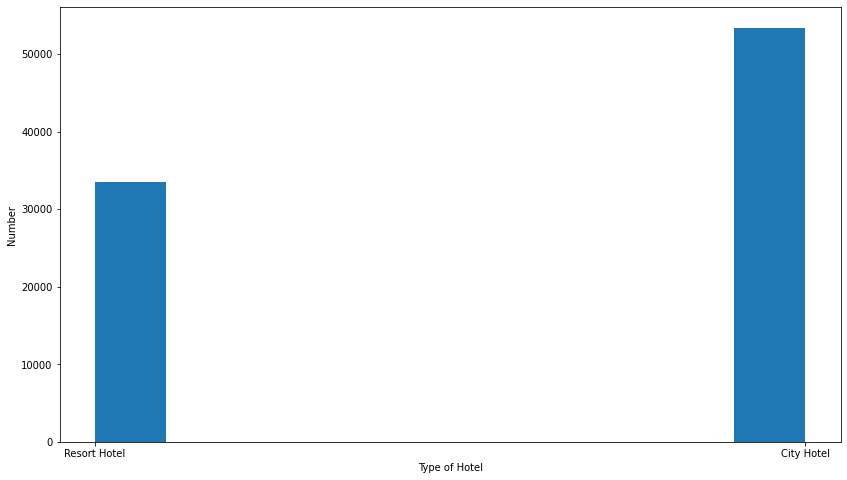

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(df['hotel'])
ax.set_xlabel('Type of Hotel')
ax.set_ylabel('Number')
plt.show()

**Lets See Scatter plot between Type of market segment and waiting list for the booking**

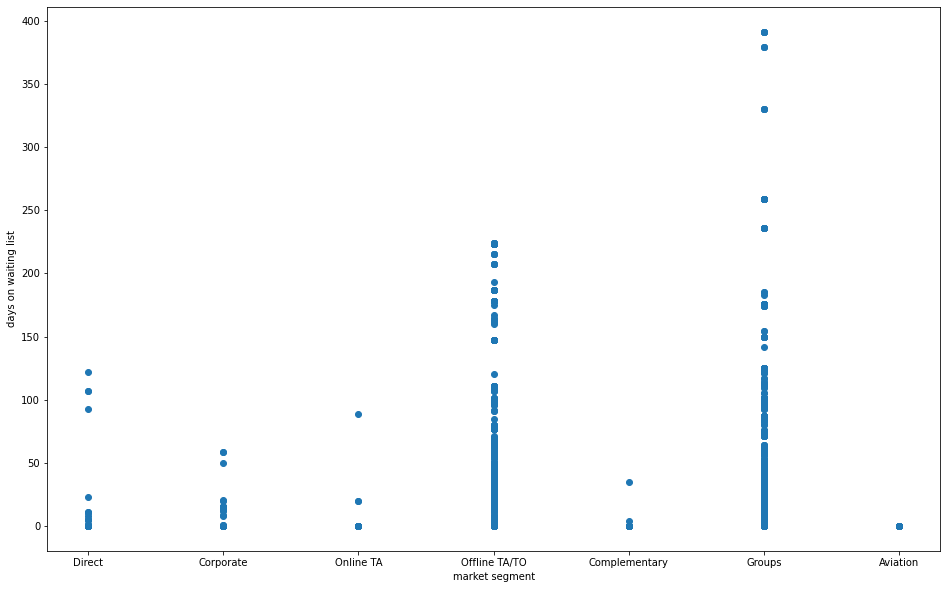

In [19]:
fig,  ax =plt.subplots(figsize=(16,10))

ax.scatter(df['market_segment'],df['days_in_waiting_list'])

ax.set_xlabel('market segment')
ax.set_ylabel('days on waiting list')
plt.show()

**Plot between Distributing Channel and days on the waiting**

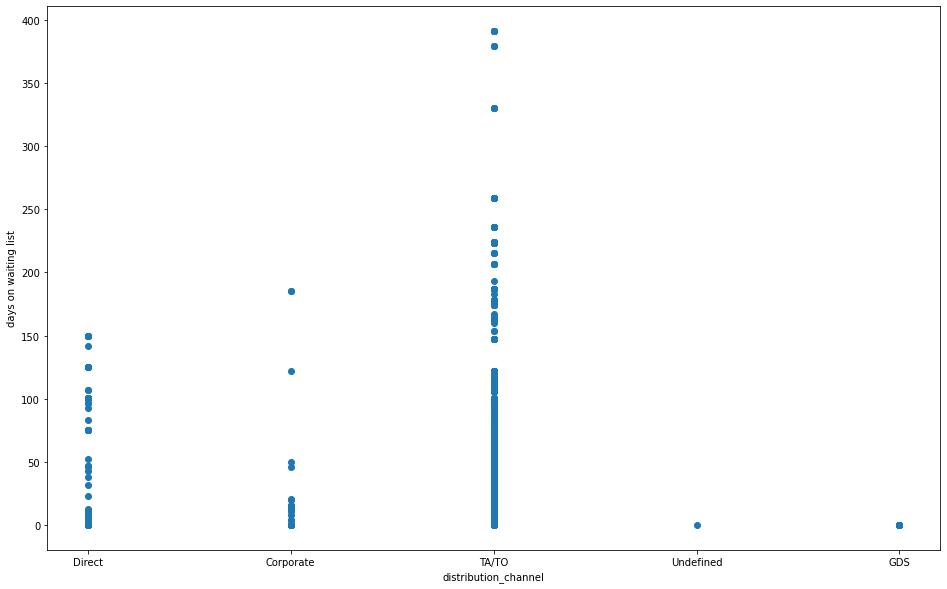

In [20]:
fig,  ax =plt.subplots(figsize=(16,10))

ax.scatter(df['distribution_channel'],df['days_in_waiting_list'])

ax.set_xlabel('distribution_channel')
ax.set_ylabel('days on waiting list')
plt.show()

# **Display the number of kids in both hotels.**

In [21]:
# lets Create a new dataframe to display hotel, adults, children, and babies only.
df1 = df[['hotel', 'adults', 'children', 'babies']]
df1['kids'] = df1['children'] + df1['babies']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,adults,children,babies,kids
0,Resort Hotel,2,0.0,0,0.0
1,Resort Hotel,2,0.0,0,0.0
2,Resort Hotel,1,0.0,0,0.0
3,Resort Hotel,1,0.0,0,0.0
4,Resort Hotel,2,0.0,0,0.0
...,...,...,...,...,...
119385,City Hotel,2,0.0,0,0.0
119386,City Hotel,3,0.0,0,0.0
119387,City Hotel,2,0.0,0,0.0
119388,City Hotel,2,0.0,0,0.0


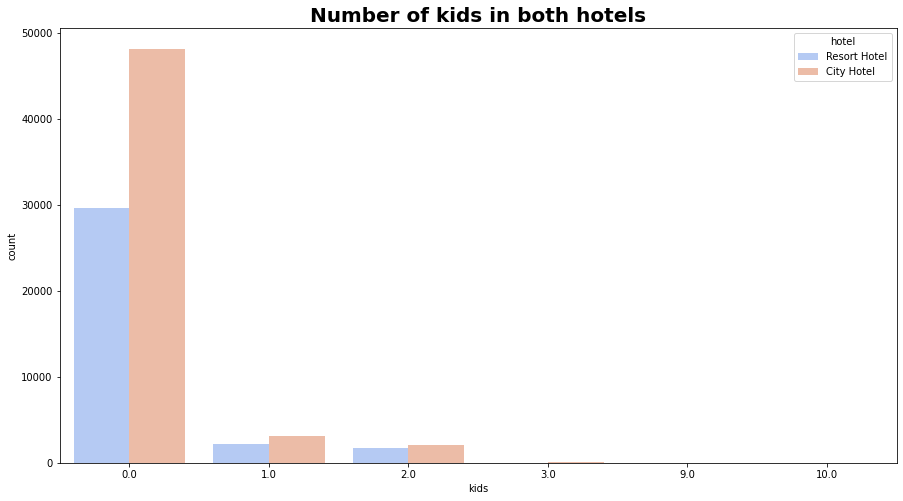

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(x='kids',hue='hotel', data=df1, palette='coolwarm')
plt.title("Number of kids in both hotels",fontweight="bold", size=20)

plt.show()

**Lets See Heatmap between type of Hotel and arrival month**

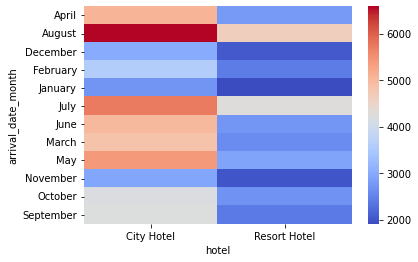

In [23]:
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

**Cancellation Percentage by year**

Text(0, 0.5, 'cancellation percentage')

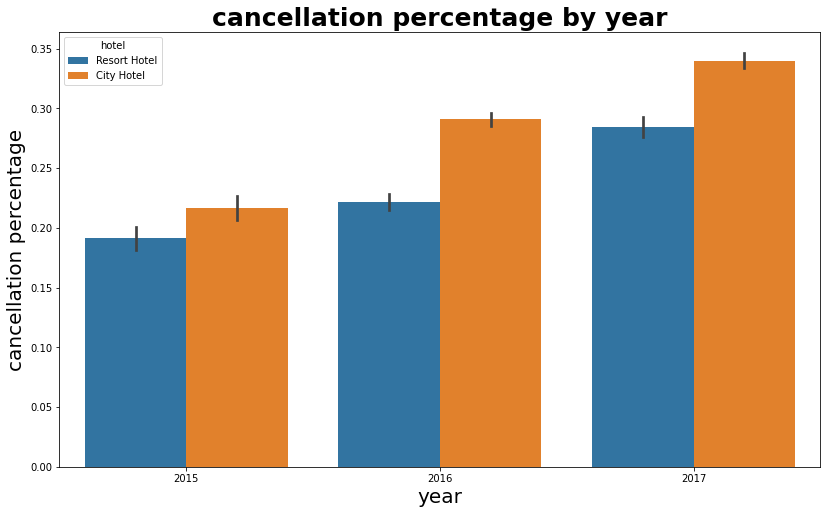

In [24]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)

sns.barplot(data = df, x= 'arrival_date_year', y = 'is_canceled',hue = 'hotel' )
plt.title('cancellation percentage by year',fontweight="bold", size=25)

plt.xlabel('year',size=20)
plt.ylabel('cancellation percentage',size=20)

**Lets draw a plot to see the relation between cancellation between repeating costumers**

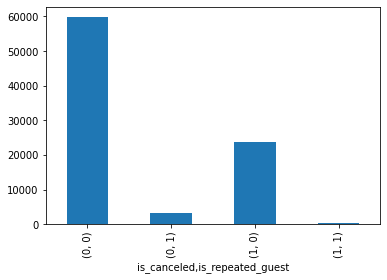

In [25]:
df3=df.groupby(['is_canceled','is_repeated_guest']).size()

df3.plot(kind='bar')

**Plot between hotel and market segment**

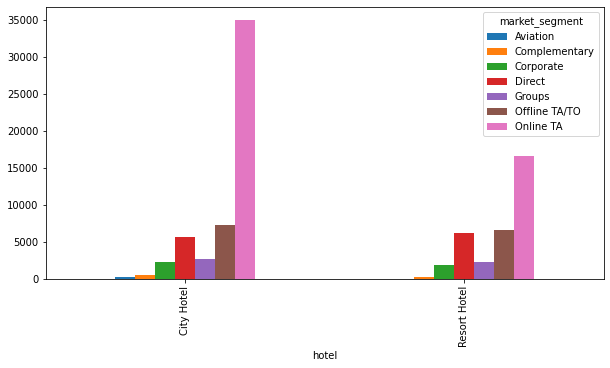

In [26]:
df4=df.groupby(['hotel','market_segment']).size()
df4=df4.unstack()
df4.plot(kind='bar',figsize=(10,5))

**Plot between hotel and distribution channel**

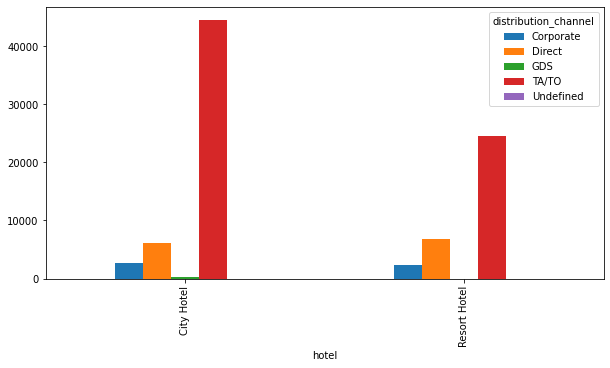

In [27]:
df5= df.groupby(['hotel','distribution_channel']).size()
df5=df5.unstack()
df5.plot(kind='bar',figsize=(10,5))

**Plot between resevation status and market segment**

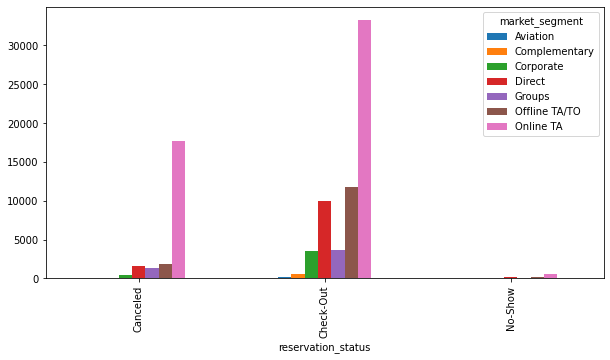

In [28]:
df6=df.groupby(['reservation_status','market_segment']).size()
df6=df6.unstack()
df6.plot(kind='bar',figsize=(10,5))

**Now Lets group the data based on month , to get some important insights**

In [29]:
grp=df.groupby('arrival_date_month')

p = grp['lead_time'].agg(np.mean)

t = grp['days_in_waiting_list'].agg(np.sum)

**Let's check out relation between the days before which booking is done which is known as lead time and month of the year**

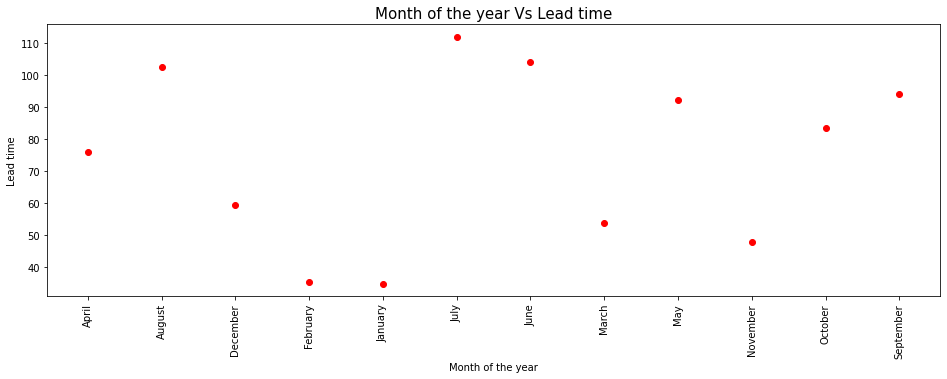

In [30]:
plt.figure(figsize=(16,5))
plt.plot(p,'ro',color='r')
plt.xticks(rotation=90)

plt.title('Month of the year Vs Lead time',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Lead time')
plt.show()

**Relation between Days in the waiting list with the month of the year**

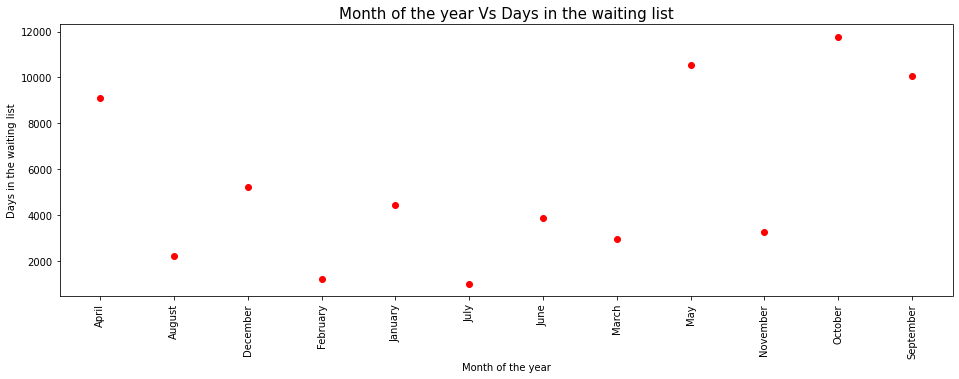

In [31]:
plt.figure(figsize=(16,5))
plt.plot(t,'ro',color='r')
plt.xticks(rotation=90)

plt.title('Month of the year Vs Days in the waiting list',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Days in the waiting list')
plt.show()

**Let's Checkout From which country most guests are coming**

In [33]:
df[df['country']=='PRT']['hotel'].value_counts()

Resort Hotel    14238
City Hotel      13211
Name: hotel, dtype: int64

In [34]:
top_10_countries = df[df['is_canceled']==0]['country'].value_counts()[:10]

In [35]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [36]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,17662,34.015099
1,GBR,8448,16.269933
2,FRA,7104,13.681535
3,ESP,5390,10.380556
4,DEU,4334,8.346815
5,IRL,2348,4.521994
6,ITA,1991,3.834450
7,BEL,1670,3.216239
8,NLD,1561,3.006317
9,USA,1416,2.727063


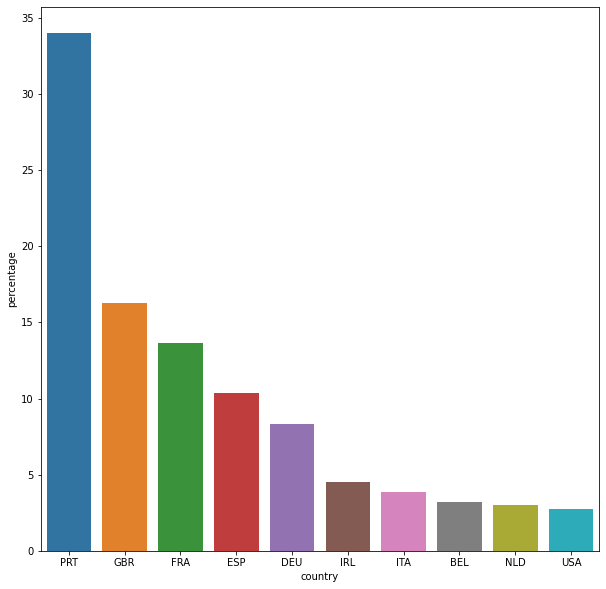

In [37]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

**So Lets See Which month have the highest number of cancellations**

In [38]:
df[df['is_canceled'] == 1]['arrival_date_month'].value_counts()

August       3618
July         3192
May          2442
April        2404
June         2353
March        1829
October      1637
September    1636
February     1414
December     1373
November     1052
January      1037
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'number_of_cancelation')

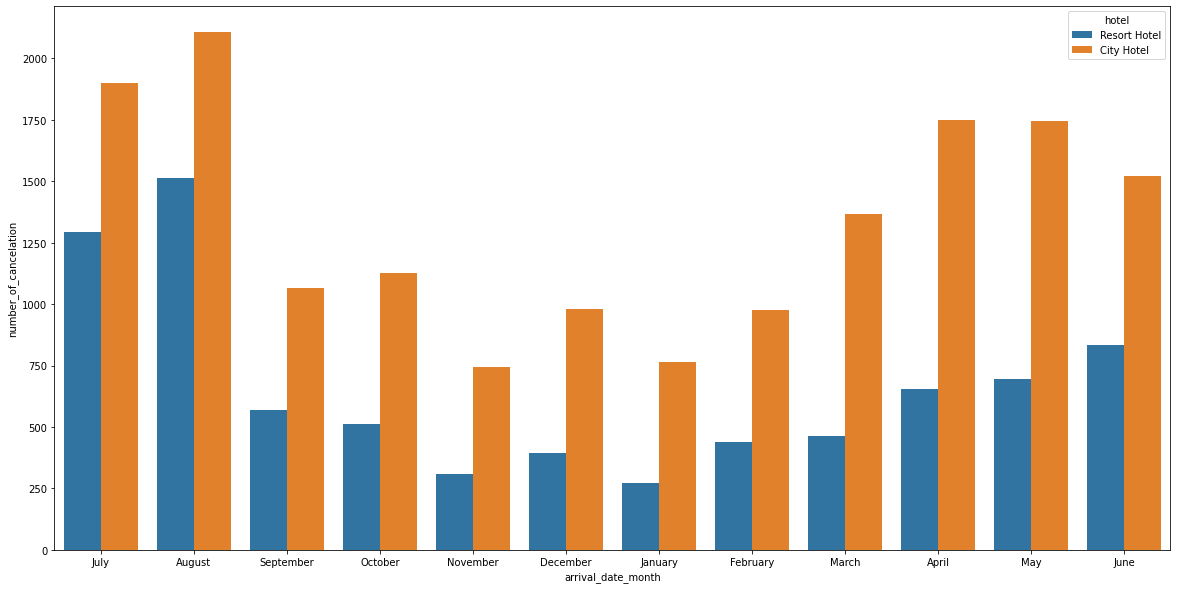

In [39]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = df[df['is_canceled'] == 1])
ax.set_ylabel('number_of_cancelation')

**Effect of lead time on cancelation**

Text(0, 0.5, 'Cancelations [%]')

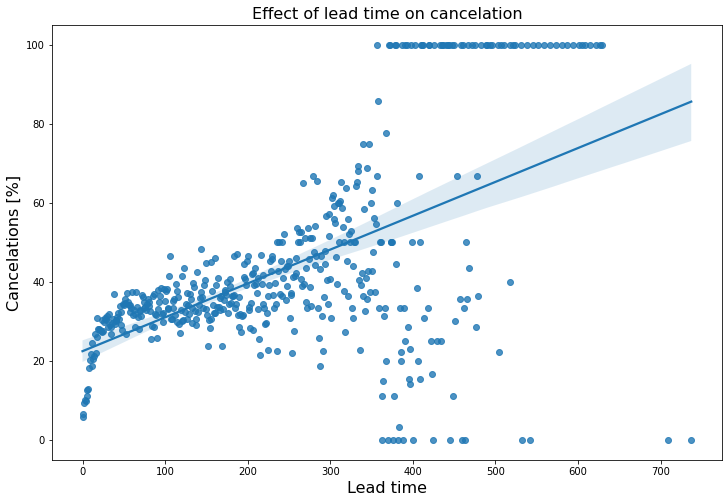

In [40]:
lead_time_df = df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

In [41]:
lead_time_df

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,5862.0,0.058683,0.235051,0.0,0.0,0.0,0.0,1.0
1,3150.0,0.066667,0.249483,0.0,0.0,0.0,0.0,1.0
2,1891.0,0.094659,0.292821,0.0,0.0,0.0,0.0,1.0
3,1690.0,0.100000,0.300089,0.0,0.0,0.0,0.0,1.0
4,1552.0,0.097938,0.297327,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
629,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


**Effect of deposit type on cancelation**

Text(0, 0.5, 'Cancelations [%]')

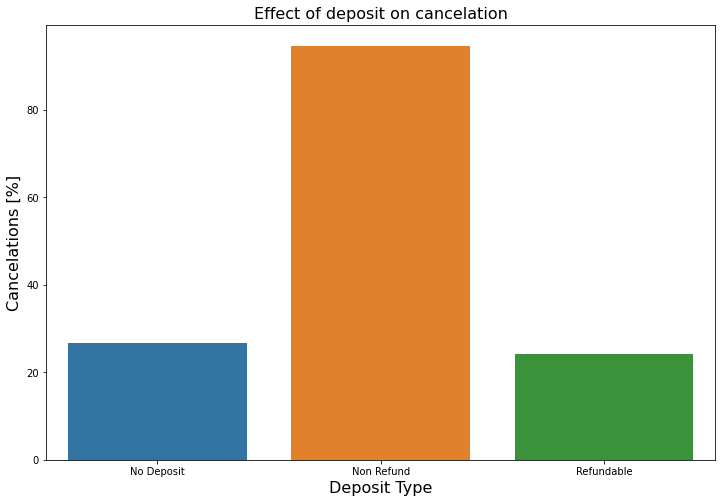

In [42]:
deposit_df = df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

In [43]:
deposit_df

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,85796.0,0.267833,0.442833,0.0,0.0,0.0,1.0,1.0
Non Refund,1037.0,0.946962,0.224217,0.0,1.0,1.0,1.0,1.0
Refundable,107.0,0.242991,0.430908,0.0,0.0,0.0,0.0,1.0


**Heatmap to show the relation between the variables**

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.183730,0.087665,0.000864,0.005281,0.059599,0.082818,0.080295,0.067027,-0.020593,-0.090145,0.050965,-0.050553,-0.094050,0.004302,0.126675,-0.183704,-0.121794
lead_time,0.183730,1.000000,0.138786,0.100970,0.009865,0.233679,0.309916,0.137500,0.027704,-0.003954,-0.148009,0.005517,-0.076399,0.076764,0.132163,0.019758,-0.085753,0.033038
arrival_date_year,0.087665,0.138786,1.000000,-0.514123,-0.010282,0.005000,0.003930,0.037455,0.040791,-0.023401,0.024048,-0.053973,0.028195,0.008786,-0.028184,0.175988,-0.038615,0.064415
arrival_date_week_number,0.000864,0.100970,-0.514123,1.000000,0.093640,0.026096,0.027368,0.023778,0.013417,0.013848,-0.037271,0.006634,-0.020757,0.011464,0.013883,0.097718,0.008637,0.046125
arrival_date_day_of_month,0.005281,0.009865,-0.010282,0.093640,1.000000,-0.017278,-0.027566,-0.001358,0.015846,-0.000752,-0.004401,-0.008687,0.000661,0.006498,0.006585,0.022246,0.008679,-0.001587
stays_in_weekend_nights,0.059599,0.233679,0.005000,0.026096,-0.017278,1.000000,0.551159,0.086270,0.027842,0.013488,-0.107932,-0.020676,-0.054141,0.049066,-0.032017,0.036015,-0.042651,0.030461
stays_in_week_nights,0.082818,0.309916,0.003930,0.027368,-0.027566,0.551159,1.000000,0.094405,0.030252,0.015891,-0.114665,-0.018904,-0.056928,0.084199,0.001796,0.050935,-0.043987,0.035449
adults,0.080295,0.137500,0.037455,0.023778,-0.001358,0.086270,0.094405,1.000000,0.022419,0.016249,-0.173194,-0.042158,-0.117754,-0.049145,-0.016125,0.245287,0.009261,0.110777
children,0.067027,0.027704,0.040791,0.013417,0.015846,0.027842,0.030252,0.022419,1.000000,0.017482,-0.045893,-0.019136,-0.028476,0.030910,-0.020526,0.326293,0.037181,0.044391
babies,-0.020593,-0.003954,-0.023401,0.013848,-0.000752,0.013488,0.015891,0.016249,0.017482,1.000000,-0.013017,-0.005336,-0.008869,0.080791,-0.006865,0.022694,0.030476,0.094475


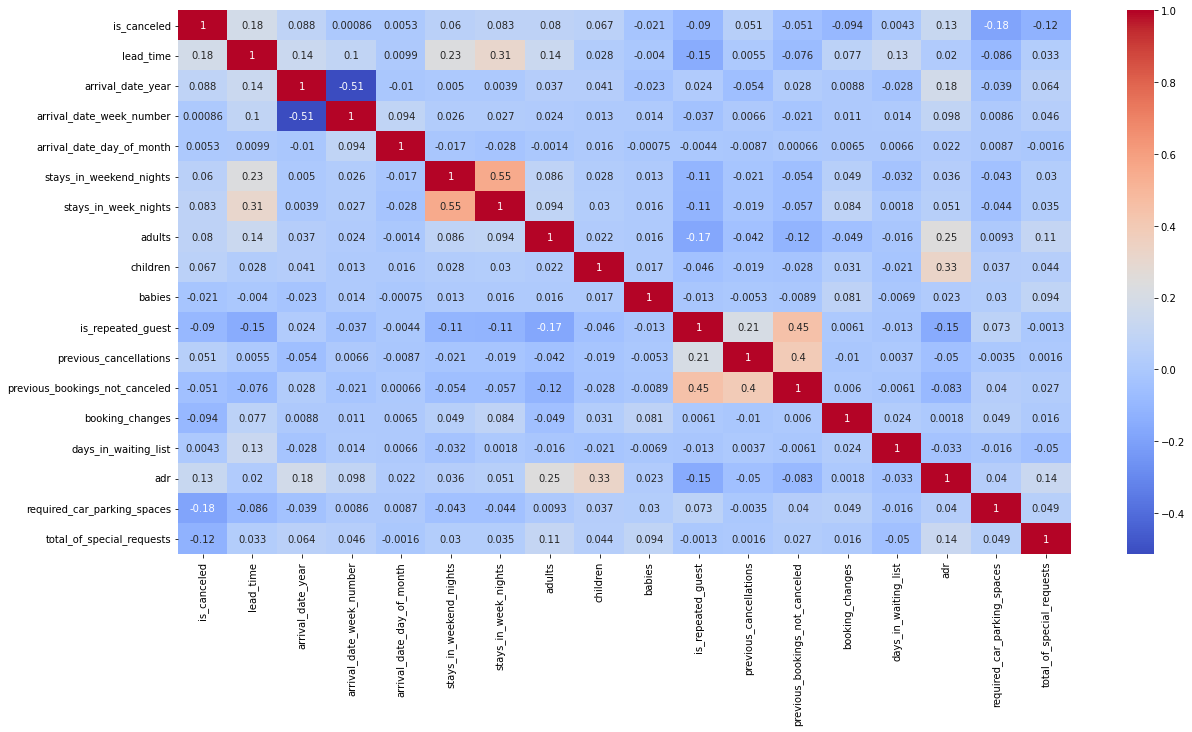

In [32]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap='coolwarm', annot=True)
c

# **Conclusion :**

**Month of August and july receives most no. of booking.**

**Booking for city hotels is twice as for resort hotels.**

**Repeated costumers cancel their hotel in very rare cases.**

**Customers coming from aviation industry has very less time i.e. they book urgently**

**People with no kid prefer to choose city hotel over resort hotel**

# **Thank You !!**